In [321]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [322]:
data_dir = Path('./Data_Files')

In [323]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [324]:
df1 = pd.read_csv(data_dir / "+60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = pd.read_csv(data_dir / "0degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = pd.read_csv(data_dir / "16cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = pd.read_csv(data_dir / "180.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = pd.read_csv(data_dir / "32cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = pd.read_csv(data_dir / "80cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = pd.read_csv(data_dir / "air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = pd.read_csv(data_dir / "minus_60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = pd.read_csv(data_dir / "no_air_.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = pd.read_csv(data_dir / "vent_air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = pd.read_csv(data_dir / "very_close_to_vent.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)

In [325]:
data_dir2 = Path("./Jun30_data_files/")

In [326]:
# for dir,subdir,files in os.walk(data_dir2):
#     for i in files:
#         print (i)
#         if i=="test2.txt" and i == "TEST2.TXT.sb-5b453c2d-NvFVlZ":
#             continue
#         dataframe = pd.read_csv(data_dir2 / i, low_memory=False, names= ['frequency','amplitude'] , index_col = False)
#         dataframe = dataframe[dataframe['frequency'] != "clocktime"]
#         print(dataframe)
#         dataframe = dataframe.dropna()
#         #dataframe = dataframe[:129]
#         #print(dataframe[:129*7])
#         df12 = df12.append(dataframe)

In [327]:
df12 = pd.read_csv(data_dir2 / "Dist1_4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]


df13 = pd.read_csv(data_dir2 / "Dist1_6.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]


df14 = pd.read_csv(data_dir2 / "Dist1_8.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]


df15 = pd.read_csv(data_dir2 / "Dist1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15[:129*2]

df16 = pd.read_csv(data_dir2 / "Dist2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df16 = df16[df16['frequency'] != "clocktime"]

df17 = pd.read_csv(data_dir2 / "Dist1_2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df17 = df17[df17['frequency'] != "clocktime"]

df18 = pd.read_csv(data_dir2 / "Dist0_5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df18 = df18[df18['frequency'] != "clocktime"]

df19 = pd.read_csv(data_dir2 / "Dist0_3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df19 = df19[df19['frequency'] != "clocktime"]


In [328]:
df19[:129]

,frequency,amplitude
0,0.00,62997.4405
1,62.50,27144.8022
2,125.00,200.6097
3,187.50,174.9460
4,250.00,155.6979
...,...,...
124,3812.50,6.6091
125,3875.00,3.3312
126,3937.50,8.6702
127,4000.00,4.8962


In [329]:
data_dir3 = Path("./July1_data_files/") 

df20 = pd.read_csv(data_dir3 / "Dist10cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df20 = df20[df20['frequency'] != "clocktime"]

df21 = pd.read_csv(data_dir3 / "Dist15cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df21 = df21[df21['frequency'] != "clocktime"]
df21 = df21[:129*4]

df22 = pd.read_csv(data_dir3 / "Dist20cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df22 = df22[df22['frequency'] != "clocktime"]

df23 = pd.read_csv(data_dir3 / "Dist25cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df23 = df23[df23['frequency'] != "clocktime"]

df24 = pd.read_csv(data_dir3 / "Dist30cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df24 = df24[df24['frequency'] != "clocktime"]


In [330]:
df21[:129*2]

,frequency,amplitude
0,0.00,64181.0745
1,62.50,27679.9321
2,125.00,805.2501
3,187.50,612.9744
4,250.00,54.4231
...,...,...
254,4687.50,2.0852
255,4750.00,4.8306
256,4812.50,6.7667
257,4875.00,4.1614


In [331]:
data_dir4 = Path("./July8/") 

df25 = pd.read_csv(data_dir4 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df25 = df25[df25['frequency'] != "clocktime"]
df25 = df25.dropna()
df25

,frequency,amplitude
0,0.00,54508.3419
1,62.50,23471.8577
2,125.00,222.4883
3,187.50,65.2300
4,250.00,22.4759
...,...,...
18844,7750.00,34.0706
18845,7812.50,72.1740
18846,7875.00,45.6315
18847,7937.50,12.6362


In [332]:
data_dir5 = Path("./19July/") 

df26 = pd.read_csv(data_dir5 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df26 = df26[df26['frequency'] != "clocktime"]
df26 = df26.dropna()


df27 = pd.read_csv(data_dir5 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df27 = df27[df27['frequency'] != "clocktime"]
df27 = df27.dropna()

df28 = pd.read_csv(data_dir5 / "desk2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df28 = df28[df28['frequency'] != "clocktime"]
df28 = df28.dropna()




In [333]:
df26 = df26[:129*145]

In [334]:
df28 = df28[:129*180]

In [335]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
# df29.append(df27, df28)


df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()

In [336]:
df_test1 = df29[129*93:]
df29 = df29[:129*93]
df29

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
12084,7750.00,4.0155
12085,7812.50,1.4535
12086,7875.00,2.2737
12087,7937.50,4.1966


In [337]:
df_test2 = df31[129*219:]
df31 = df31[:129*219]
df31

# df_test1 = df29[129*93:]
# df29 = df29[:129*93]
# df29

,frequency,amplitude
0,0.00,67943.6656
1,62.50,29039.8095
2,125.00,277.4737
3,187.50,144.1827
4,250.00,30.2149
...,...,...
28464,7750.00,28.8685
28465,7812.50,29.1402
28466,7875.00,33.5878
28467,7937.50,22.7929


In [338]:
data_dir7 = Path("./final/") 

df32 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()

df33 = pd.read_csv(data_dir7 / "fan_66cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df33 = df33[df33['frequency'] != "clocktime"]
df33 = df33.dropna()

df34 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
# df34 = df34[:129*198]

df35 = pd.read_csv(data_dir7 / "150cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
# df35 = df35[:211*129]


data_dir8 = Path("./finale/") 
df36 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df36 = df36[df36['frequency'] != "clocktime"]
df36 = df36.dropna()
# df36 = df36[:129*198]

df37 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df37 = df37[df37['frequency'] != "clocktime"]
df37 = df37.dropna()
# df37 = df37[:129*198]

In [339]:
df_test3 = df32[129*87:]
# print(df_test3)
df32 = df32[:129*87]
df_test3

,frequency,amplitude
11310,0.00,1662.1214
11311,62.50,1148.8770
11312,125.00,48.3063
11313,187.50,244.3460
11314,250.00,135.1312
...,...,...
17804,7750.00,7.1328
17805,7812.50,4.1897
17806,7875.00,6.9261
17807,7937.50,4.1797


In [340]:
df_test4 = df33[129*514:]
df33 = df33[:129*514]

df_test5 = df34[129*148:]
df34 = df34[:129*148]

df_test6 = df35[129*161:]
df35 = df35[:129*161]

In [341]:

for i in range(147):
    print (len(df32[:129*i])%129)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [342]:
# df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33])
df = df29.append([df30,df31, df32, df34, df35, df36, df37])



In [343]:
df = df.dropna()
df[:129*800]

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
9224,7750.00,5.3719
9225,7812.50,6.2518
9226,7875.00,3.7185
9227,7937.50,5.7485


In [344]:
def convert(df: pd.DataFrame, frame_size=129):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

In [345]:
# df = df[df.columns[1:2]]
df

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
17804,7750.00,7.1328
17805,7812.50,4.1897
17806,7875.00,6.9261
17807,7937.50,4.1797


In [346]:
data = convert(df)
data.shape


(1063, 129)

In [347]:
X = data[:,:-1]

X = X[:, :6]
X.shape

(1063, 6)

In [348]:
y = data[:, -1]
y.shape
# print(y)

(1063,)

In [349]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>34:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.57


In [350]:
np.min(y), np.max(y)

(2.57, 32.9)

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [352]:
# testing = convert(df_test6)
# testing.shape


# X_test = testing[:,:-1]

# X_test = X_test[:, :9]
# X_test.shape

# y_test = testing[:,-1]
# y_test.shape

In [353]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [354]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [355]:
print(y_pred[:5])
print(y_test[:5])

[28.84093019  4.82159924  4.87161107  4.79385681  4.854773  ]
[30.78  3.98  4.32  4.58  4.49]


In [356]:
print(y_train_pred[:5])
print(y_train[:5])

[5.25252625 5.20935388 4.79894858 5.03362217 5.05604036]
[5.25 3.29 4.86 3.08 7.64]


In [357]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  2.275659082353303
Test Reg score:  0.9738577623322846


In [358]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))
    

MSE of training:  1.2435064928544848
Train Reg score:  0.9871019847925199


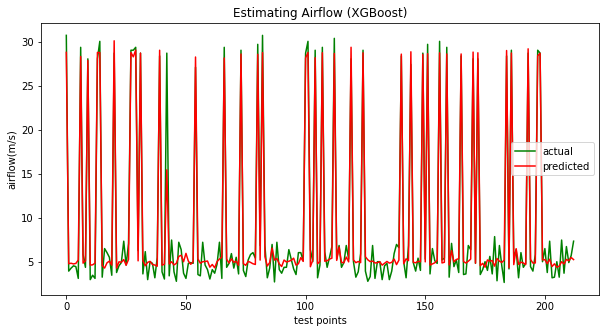

In [359]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'g', label="actual")
plt.plot(y_pred, 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("1m_v1.jpg")


Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

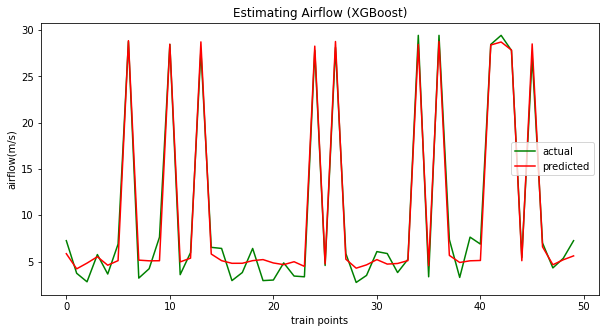

In [360]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")

